In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import cv2
import os

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import os
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical

# Imports for usint %%timeit cell magic
import time
from PIL import Image, ImageDraw

In [ ]:
#0-eyes open
#1-eyes close
#2-no yawn
#3-yawn
X = []
y = []
for img_name in os.listdir("./gdrive/MyDrive/new_aug/closed"):
    img = cv2.imread(f"./gdrive/MyDrive/new_aug/closed/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.resize(img, (100, 100))

    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(1)

for img_name in os.listdir("./gdrive/MyDrive/new_aug/open"):
    img = cv2.imread(f"./gdrive/MyDrive/new_aug/open/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.resize(img, (100, 100))

    img = np.array(img)

    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(0)

for img_name in os.listdir("./gdrive/MyDrive/new_aug/yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/new_aug/yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.resize(img, (100, 100))

    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(3)

for img_name in os.listdir("./gdrive/MyDrive/new_aug/no_yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/new_aug/no_yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.resize(img, (100, 100))

    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(2)

In [ ]:
print(len(X), len(y))

16835 16835


In [ ]:
X = np.array(X)
y = np.array(y)
X = X.reshape((-1, 100, 100, 1))

In [ ]:
print(X.shape, y.shape)

(16835, 100, 100, 1) (16835,)


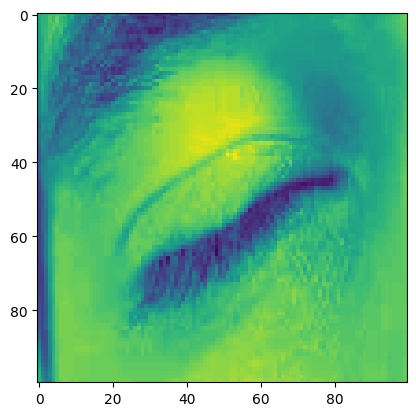

In [ ]:
plt.figure()
plt.imshow(X[1000])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(13468, 100, 100, 1) (13468,) (3367, 100, 100, 1) (3367,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(100, (3, 3), activation="relu", input_shape=(100, 100, 1)),
    keras.layers.Conv2D(150, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(100, (3, 3), activation="relu"),
    keras.layers.Conv2D(150, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(4, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       1000      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       135150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 100)       135100    
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 150)       135150    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 150)      0         
 2D)                                                    

In [ ]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
hist = model.fit(X_train, y_train,epochs=5)

Epoch 1/5
421/421 [==============================] - 3760s 9s/step - loss: 0.3788 - accuracy: 0.8277
Epoch 2/5
421/421 [==============================] - 3835s 9s/step - loss: 0.1229 - accuracy: 0.9554
Epoch 3/5
421/421 [==============================] - 3834s 9s/step - loss: 0.0561 - accuracy: 0.9808
Epoch 4/5
421/421 [==============================] - 3766s 9s/step - loss: 0.0302 - accuracy: 0.9905
Epoch 5/5
421/421 [==============================] - 3740s 9s/step - loss: 0.0467 - accuracy: 0.9843


In [ ]:
print(model.evaluate(X_test, y_test))

106/106 [==============================] - 268s 3s/step - loss: 0.0688 - accuracy: 0.9795
[0.06883393973112106, 0.9795069694519043]


In [ ]:
predictions=model.predict(X_test)

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_pred

array([2, 1, 3, ..., 1, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       820
           1       0.98      0.99      0.98       854
           2       0.97      0.99      0.98       874
           3       0.98      0.97      0.97       819

    accuracy                           0.98      3367
   macro avg       0.98      0.98      0.98      3367
weighted avg       0.98      0.98      0.98      3367



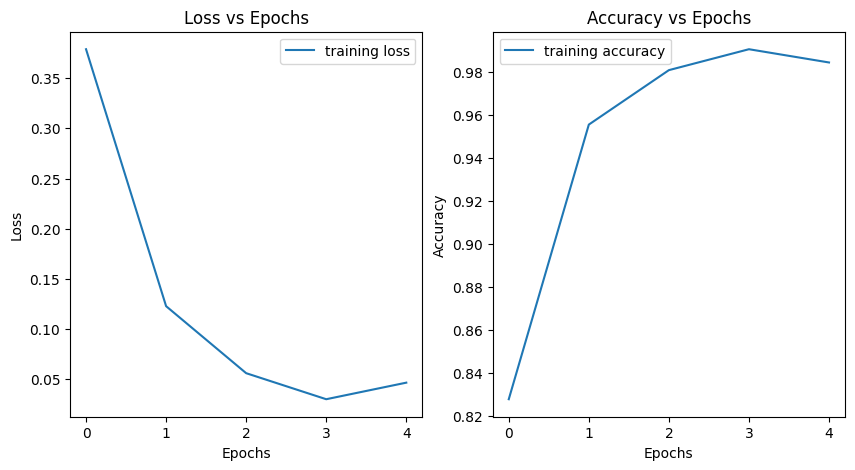

In [ ]:
# Plot loss vs epochs graph sideways
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(hist.history['loss'], label='training loss')
ax1.set_title('Loss vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy vs epochs graph sideways
ax2.plot(hist.history['accuracy'], label='training accuracy')
ax2.set_title('Accuracy vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()